### Random Forest Classifier

### Context
This is a Glass Identification Data Set from UCI. It contains 10 attributes including id. The response is glass type(discrete 7 values)

## Content :
### Attribute Information:

Id number: 1 to 214 (removed from CSV file)
RI: refractive index
Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
Mg: Magnesium
Al: Aluminum
Si: Silicon
K: Potassium
Ca: Calcium
Ba: Barium
Fe: Iron
### Type of glass: (class attribute)
-- 1 buildingwindowsfloatprocessed -- 2 buildingwindowsnonfloatprocessed -- 3 vehiclewindowsfloatprocessed
-- 4 vehiclewindowsnonfloatprocessed (none in this database)
-- 5 containers
-- 6 tableware
-- 7 headlamps

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [137]:
df = pd.read_csv("glass.csv")
print(df.info())
print(df.describe())
print(df.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None
               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516523   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000

### Feature Engineering:
#### some features have minimum values are zeros so need to impute values here

In [138]:
print((df==0).sum())
print("total zeros in whole data:" ,np.count_nonzero(df==0))

RI        0
Na        0
Mg       42
Al        0
Si        0
K        30
Ca        0
Ba      176
Fe      144
Type      0
dtype: int64
total zeros in whole data: 392


In [139]:
## mark the zeros value as nan and then impute with mean/median values
from numpy import nan
from numpy import isnan
df[['Mg','K','Ba','Fe']]=df[['Mg','K','Ba','Fe']].replace(0,nan)
df.fillna(df.mean(),inplace=True)

In [140]:
print(df.describe())

               RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    3.340058    1.444907   72.650935    0.578098   
std      0.003037    0.816604    0.559016    0.499270    0.774546    0.620389   
min      1.511150   10.730000    0.330000    0.290000   69.810000    0.020000   
25%      1.516523   12.907500    3.340058    1.190000   72.280000    0.472500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.578098   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe        Type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.985789    0.174286    2.780374  
std      1.423153    0.323485    0.052698    2.103739  
min      5.430000    0.060000    0.010000    1

            RI        Na        Mg        Al        Si         K        Ca  \
RI    1.000000 -0.191885 -0.084740 -0.407326 -0.542052 -0.319690  0.810403   
Na   -0.191885  1.000000 -0.066332  0.156794 -0.069809 -0.126055 -0.275442   
Mg   -0.084740 -0.066332  1.000000 -0.242303 -0.022124 -0.035689 -0.236581   
Al   -0.407326  0.156794 -0.242303  1.000000 -0.005524  0.399648 -0.259592   
Si   -0.542052 -0.069809 -0.022124 -0.005524  1.000000 -0.118959 -0.208732   
K    -0.319690 -0.126055 -0.035689  0.399648 -0.118959  1.000000 -0.293764   
Ca    0.810403 -0.275442 -0.236581 -0.259592 -0.208732 -0.293764  1.000000   
Ba    0.142041  0.043654  0.010674  0.117520 -0.206785  0.112915 -0.031952   
Fe    0.081229 -0.209914 -0.150034 -0.055671 -0.076843  0.060973  0.075567   
Type -0.164237  0.502898 -0.385883  0.598829  0.151565  0.181972  0.000952   

            Ba        Fe      Type  
RI    0.142041  0.081229 -0.164237  
Na    0.043654 -0.209914  0.502898  
Mg    0.010674 -0.150034 -0.38

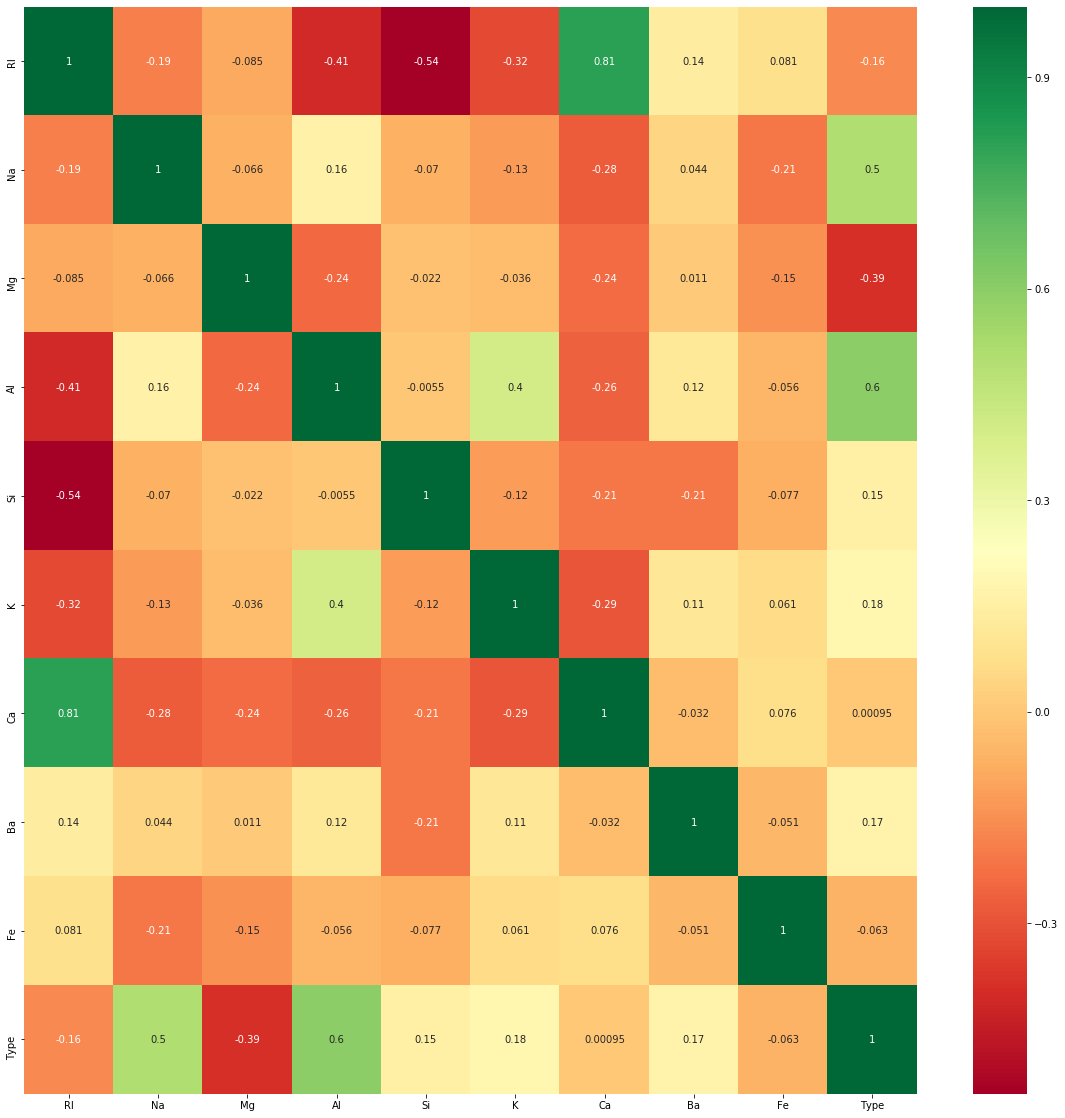

In [141]:
corrmat=df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")
print(df.corr())

In [142]:
### split data
X=df.drop("Type",axis=1).values
y=df["Type"].values

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [144]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8604651162790697

In [147]:
## Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV
model_params ={
     'svm': {
        'model':svm.SVC(gamma='auto'),
        'params' : {
            'C':[1,10,20],
            'kernel' :['rbf','linear']
        }
    },
    'Randomforest':{
          'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10,100,200],
            'criterion' :['gini','entropy'],
            'max_depth' :[2,4,6,8,10]
        }
    }
    }


In [148]:
scores = []
for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,  
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.684706,"{'C': 20, 'kernel': 'rbf'}"
1,Randomforest,0.749076,"{'criterion': 'entropy', 'max_depth': 10, 'n_e..."


In [167]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=10)
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
accuracy_score(y_test,y_predict)

0.8837209302325582

## Confusion Matrix

In [168]:
CM=confusion_matrix(y_test,y_predict)
CM

array([[11,  0,  0,  0,  0,  0],
       [ 1, 12,  0,  0,  0,  1],
       [ 1,  0,  2,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0],
       [ 0,  0,  0,  0,  2,  1],
       [ 0,  0,  0,  0,  0,  8]], dtype=int64)

## More Analysis with more feature engineering in next post